<a href="https://colab.research.google.com/github/maicken/INF442_P8/blob/master/Time_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Other analysis of the data

In [0]:
# We will make a analysis about the kind os accidents that happen to pedesters
# They are part of x % of the accidents that happen

# import required libraries
import pandas as pd
import numpy as np

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Getting the dataframe that we will use to analyse
%cd "gdrive/My Drive/Colab Notebooks/INF442_P8"

/content/gdrive/My Drive/Colab Notebooks/INF442_P8


In [106]:
df = pd.read_csv('dataframe.csv')
df_c = pd.read_csv('caracteristiques.csv')
df_c = df_c[['Num_Acc', 'mois', 'jour', 
                 'hrmn']].copy()
df = df.join(df_c.set_index('Num_Acc'), on='num_acc')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232233 entries, 0 to 1232232
Data columns (total 33 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   num_acc  1232233 non-null  int64  
 1   num_veh  1232233 non-null  object 
 2   place    1232233 non-null  float64
 3   catu     1232233 non-null  int64  
 4   grav     1232233 non-null  int64  
 5   age      1232233 non-null  float64
 6   trajet   1232233 non-null  float64
 7   secu     1232233 non-null  float64
 8   locp     1232233 non-null  float64
 9   actp     1232233 non-null  float64
 10  etatp    1232233 non-null  float64
 11  an       1232233 non-null  int64  
 12  lum      1232233 non-null  int64  
 13  dep      1232233 non-null  int64  
 14  agg      1232233 non-null  int64  
 15  int      1232233 non-null  int64  
 16  atm      1232233 non-null  float64
 17  col      1232233 non-null  float64
 18  catr     1232233 non-null  int64  
 19  circ     1232233 non-null  float64
 20  nb

,num_acc,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,an,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv,mois,jour,hrmn
0,201800000001,B01,1.0,1,3,90.0,0.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,3.0,1.0,1,24,1505
1,201800000001,A01,1.0,1,1,58.0,5.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,2.0,15.0,1,24,1505
2,201800000002,A01,1.0,1,1,71.0,0.0,11.0,0.0,0.0,0.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0,2,12,1015
3,201800000002,A01,1.0,3,4,59.0,0.0,2.0,2.0,3.0,1.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0,2,12,1015
4,201800000003,A01,1.0,1,3,31.0,5.0,21.0,0.0,0.0,0.0,18,1,590,2,3,1.0,7.0,3,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2,2.0,1.0,1.0,3,4,1135


In [107]:
# First thing we swap 2 and 4 in grav to make more sense
df.replace({'grav': {2: -1}})
df.replace({'grav': {4: 2}})
df.replace({'grav': {-1: 4}})

,num_acc,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,an,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv,mois,jour,hrmn
0,201800000001,B01,1.0,1,3,90.0,0.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,3.0,1.0,1,24,1505
1,201800000001,A01,1.0,1,1,58.0,5.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,2.0,15.0,1,24,1505
2,201800000002,A01,1.0,1,1,71.0,0.0,11.0,0.0,0.0,0.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0,2,12,1015
3,201800000002,A01,1.0,3,4,59.0,0.0,2.0,2.0,3.0,1.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0,2,12,1015
4,201800000003,A01,1.0,1,3,31.0,5.0,21.0,0.0,0.0,0.0,18,1,590,2,3,1.0,7.0,3,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2,2.0,1.0,1.0,3,4,1135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232228,201000069384,A01,1.0,1,4,41.0,9.0,13.0,0.0,0.0,0.0,10,3,974,1,1,1.0,7.0,2,1.0,2.0,0.0,1.0,1.0,0.0,3.0,3,7.0,1.0,1.0,12,29,500
1232229,201000069385,B01,1.0,1,4,29.0,9.0,93.0,0.0,0.0,0.0,10,2,974,2,1,1.0,3.0,4,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1,2.0,1.0,21.0,12,30,1805
1232230,201000069385,A01,1.0,1,1,28.0,9.0,11.0,0.0,0.0,0.0,10,2,974,2,1,1.0,3.0,4,2.0,1.0,0.0,1.0,1.0,0.0,1.0,3,2.0,3.0,15.0,12,30,1805
1232231,201000069386,B01,1.0,1,4,14.0,9.0,22.0,0.0,0.0,0.0,10,3,974,2,1,1.0,3.0,4,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1,2.0,1.0,17.0,12,31,2025


In [0]:
df_year = []
for i in range(9):
  df_year.append(df[df.an == 10 + i])

In [109]:
print("Histogram for years")
print()
print(df['an'].value_counts())
print()

Histogram for years

10    154192
11    148543
12    138628
17    136021
16    133422
14    132186
15    130378
18    130169
13    128694
Name: an, dtype: int64



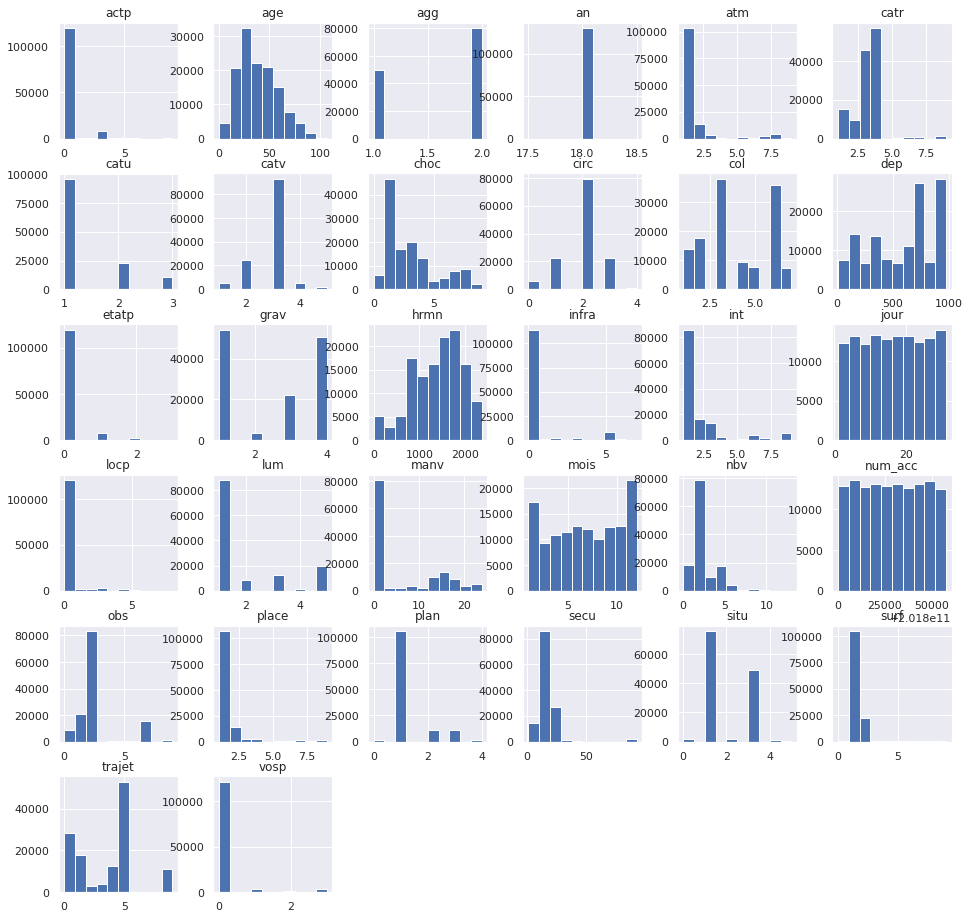

In [110]:
hist = df_year[8].hist(figsize=(16,16))

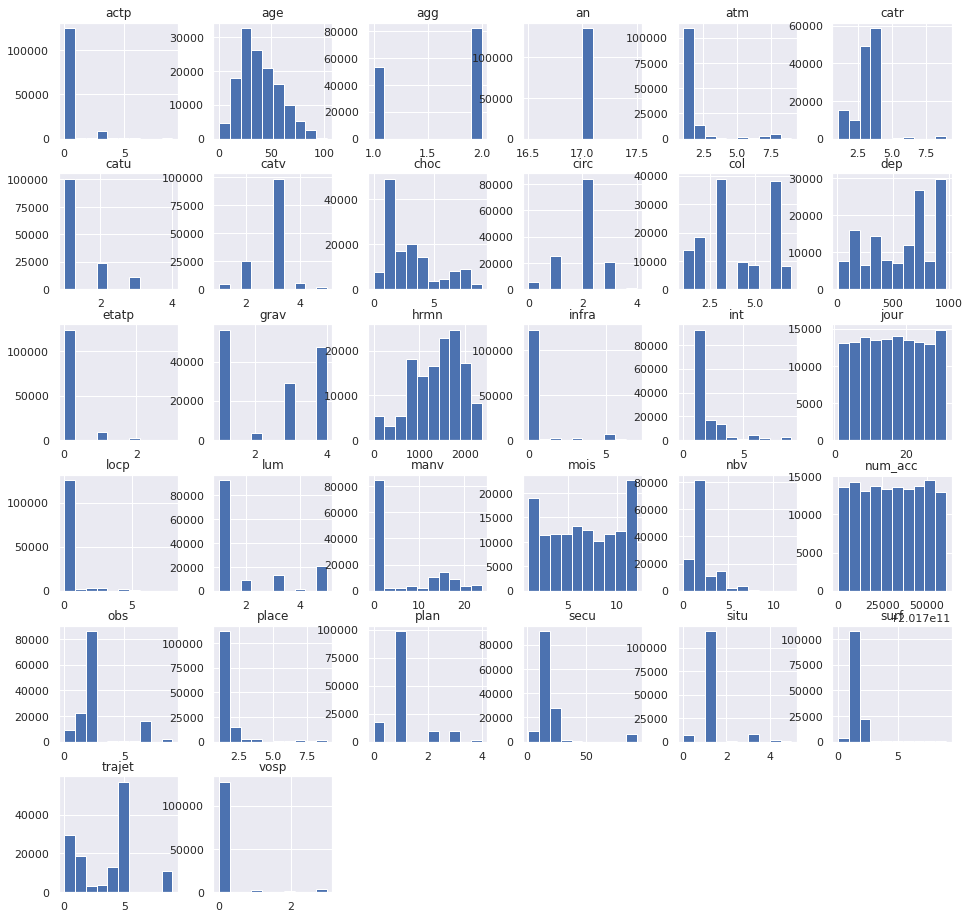

In [111]:
hist = df_year[7].hist(figsize=(16,16))

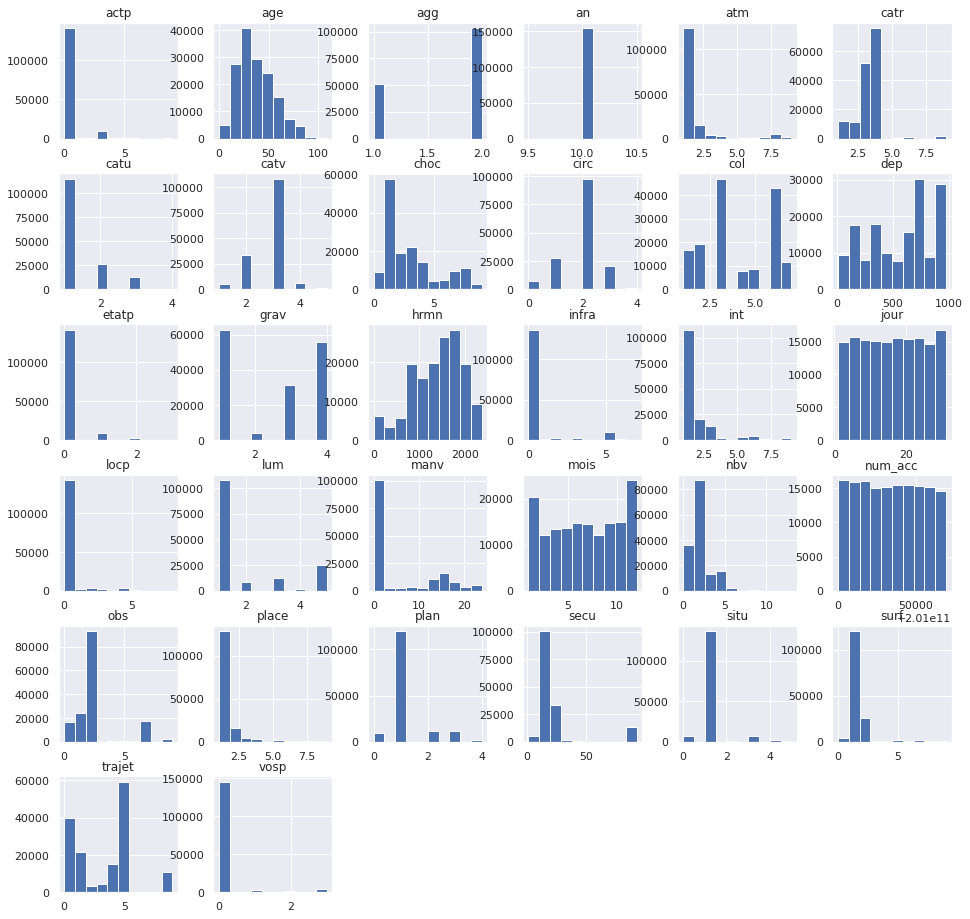

In [112]:
hist = df_year[0].hist(figsize=(16,16))

In [0]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns

df['an'] = 2000 + df['an']
df['min'] = df['hrmn'] % 100
df['hr'] = df['hrmn'] / 100
del df['hrmn']

In [0]:
df_test = df.copy()

df_test.rename(columns={'an' : 'year'}, inplace=True)
df_test.rename(columns={'mois' : 'month'}, inplace=True)
df_test.rename(columns={'jour' : 'day'}, inplace=True)
df_test.rename(columns={'hr' : 'hour'}, inplace=True)
df_test.rename(columns={'min' : 'minute'}, inplace=True)

# pd.to_datetime(df.an*10000+df.mois*100+df.jour+,format='%Y%m%d')
df_test['date'] = pd.to_datetime(df_test[['year', 'month', 'day']])

In [96]:
df_test = df_test.set_index('date')
df_test2 = df_test.loc['2018-01-01':'2018-12-31']
df_test2.head(3)

,num_acc,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,year,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv,month,day,minute,hour
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-24,201800000001,B01,1.0,1,3,90.0,0.0,11.0,0.0,0.0,0.0,2018,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,3.0,1.0,1,24,5,15.05
2018-01-24,201800000001,A01,1.0,1,1,58.0,5.0,11.0,0.0,0.0,0.0,2018,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,2.0,15.0,1,24,5,15.05
2018-02-12,201800000002,A01,1.0,1,1,71.0,0.0,11.0,0.0,0.0,0.0,2018,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0,2,12,15,10.15


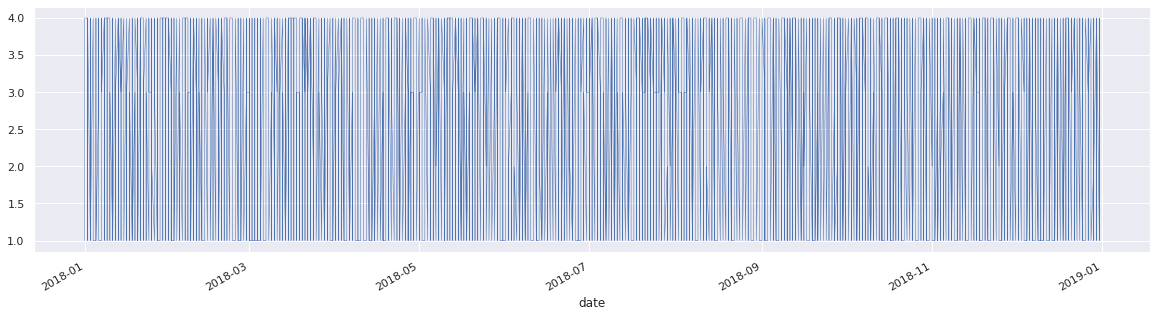

In [113]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 5)})

df_test2['grav'].plot(linewidth=0.5);

In [0]:
# How could we identity the time where there is more probability of ocurring an accident

